In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

# #confusion matix
from sklearn import metrics
# Calculate Accuracy
from sklearn.metrics import *
# to creating and reading pickle file
import pickle 

import nltk
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# from util import Util_class as obj_util
import importlib.util

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [3]:
# load testing dataset
test_file = open("CSV_files/Testing_file.csv","rb")
x_test = pickle.load(test_file)
y_test = pickle.load(test_file) 
test_file.close()

In [4]:
len(x_test), x_test.shape

(300, (300, 1500))

In [33]:
#load model
file1 = open('Naive_Bayes.pkl', 'rb')
classifier = pickle.load(file1)
obj_x = pickle.load(file1)

In [34]:
# x tranform only bcoz we already fit this model while training
x_test = obj_x.transform(x_test)



Confusion Matrix:
 [[ 92  51]
 [ 22 135]]

 Accuracy: average_precision_score : 69.74344222998425

               precision    recall  f1-score   support

           0       0.81      0.64      0.72       143
           1       0.73      0.86      0.79       157

    accuracy                           0.76       300
   macro avg       0.77      0.75      0.75       300
weighted avg       0.76      0.76      0.75       300


 ROC curve 



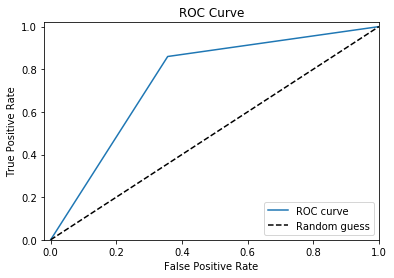

In [35]:
# y prediction
y_pre = obj_util.y_prediction(x_test, classifier)

# Confusion matrix
cm = obj_util.confusion_matrix(y_test, y_pre)
print("\n\nConfusion Matrix:\n",cm)

# Calculate accuracy
accuracy = average_precision_score(y_test, y_pre)* 100
print("\n Accuracy: average_precision_score :", accuracy)

print("\n",classification_report(y_test, y_pre))

y_pred_prob = classifier.predict_proba(x_test)[:,1]

# Visualisation
print("\n ROC curve \n")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")


In [36]:
# calculate accuracy
def accuracy(y_predict,y_actual):
    # calculate accuracy 
    accuracy_score = metrics.accuracy_score(y_actual, y_predict) * 100
    average_precision = average_precision_score(y_actual, y_predict) * 100
    f1_score_acc = f1_score(y_actual, y_predict)* 100  
    
    return accuracy_score,average_precision,f1_score_acc

accuracy_score,average_precision,f1_score_acc = accuracy(y_pre,y_test)
print('\n\nAverage accuracy_score:' , accuracy_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('Accuracy by F1-score:',f1_score_acc)



Average accuracy_score: 75.66666666666667
Average precision-recall score: 69.74
Accuracy by F1-score: 78.71720116618076
